In [1]:
import requests


# FOR QUICK FASTAPI SETUP :  https://fastapi.tiangolo.com/tutorial/first-steps/

In [2]:
import pprint

In [3]:
base = "http://localhost:8000/"

In [6]:
%%time

print('- making a sample request -')

res = requests.get(url=base)

- making a sample request -
CPU times: total: 0 ns
Wall time: 2.04 s


In [7]:
res.status_code

200

In [8]:
res.content

b'{"message":"Hello!\\nYou have made a request to root route at Tue Nov 14 20:55:45 2023"}'

In [9]:
res.text

'{"message":"Hello!\\nYou have made a request to root route at Tue Nov 14 20:55:45 2023"}'

## weather api - raw from source

https://rapidapi.com/weatherapi/api/weatherapi-com

In [10]:
apiKey = "add-api-Key"

In [11]:
# import requests
# already imported

## boilerplate code from official docs of rapidapi-weatherapi

url = "https://weatherapi-com.p.rapidapi.com/current.json"

querystring = {"q":"53.1,-0.13"}

headers = {
"X-RapidAPI-Key": apiKey,
"X-RapidAPI-Host": "weatherapi-com.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

# print(response.json())

pprint.pprint(response.json())

{'current': {'cloud': 0,
             'condition': {'code': 1000,
                           'icon': '//cdn.weatherapi.com/weather/64x64/day/113.png',
                           'text': 'Sunny'},
             'feelslike_c': 10.0,
             'feelslike_f': 50.0,
             'gust_kph': 30.3,
             'gust_mph': 18.8,
             'humidity': 82,
             'is_day': 1,
             'last_updated': '2023-11-14 15:15',
             'last_updated_epoch': 1699974900,
             'precip_in': 0.0,
             'precip_mm': 0.09,
             'pressure_in': 29.53,
             'pressure_mb': 1000.0,
             'temp_c': 12.0,
             'temp_f': 53.6,
             'uv': 3.0,
             'vis_km': 10.0,
             'vis_miles': 6.0,
             'wind_degree': 270,
             'wind_dir': 'W',
             'wind_kph': 20.2,
             'wind_mph': 12.5},
 'location': {'country': 'United Kingdom',
              'lat': 53.1,
              'localtime': '2023-11-14 15:23',
    

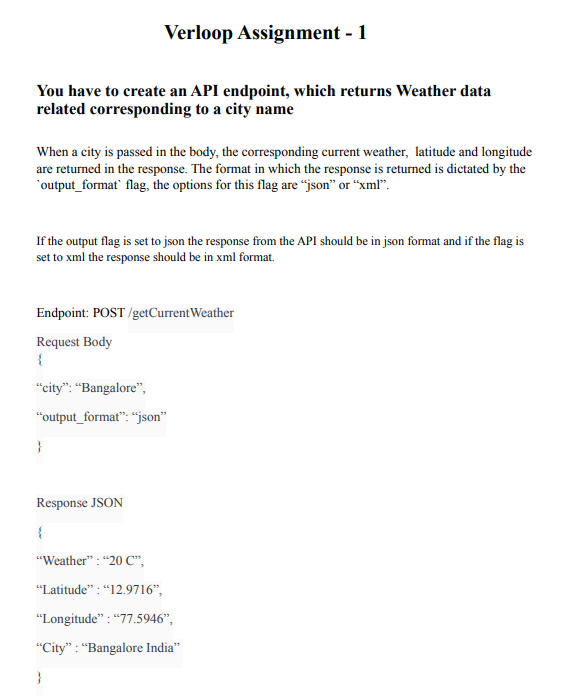

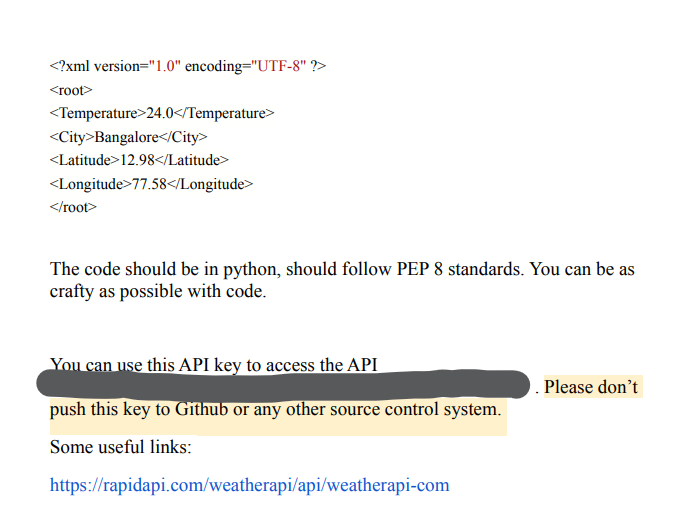

In [12]:
# import requests
# already imported

## boilerplate code from official docs of rapidapi-weatherapi

url = "https://weatherapi-com.p.rapidapi.com/current.json"

querystring = {"q":"agra"}

headers = {
"X-RapidAPI-Key": apiKey,
"X-RapidAPI-Host": "weatherapi-com.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

# print(response.json())

pprint.pprint(response.json())

{'current': {'cloud': 32,
             'condition': {'code': 1003,
                           'icon': '//cdn.weatherapi.com/weather/64x64/night/116.png',
                           'text': 'Partly cloudy'},
             'feelslike_c': 21.9,
             'feelslike_f': 71.4,
             'gust_kph': 14.3,
             'gust_mph': 8.9,
             'humidity': 38,
             'is_day': 0,
             'last_updated': '2023-11-14 20:45',
             'last_updated_epoch': 1699974900,
             'precip_in': 0.0,
             'precip_mm': 0.0,
             'pressure_in': 30.02,
             'pressure_mb': 1017.0,
             'temp_c': 21.9,
             'temp_f': 71.4,
             'uv': 1.0,
             'vis_km': 10.0,
             'vis_miles': 6.0,
             'wind_degree': 346,
             'wind_dir': 'NNW',
             'wind_kph': 6.8,
             'wind_mph': 4.3},
 'location': {'country': 'India',
              'lat': 27.18,
              'localtime': '2023-11-14 20:55',
   

### sample response

```json

{'message': {'current': {'cloud': 75,
                         'condition': {'code': 1003,
                                       'icon': '//cdn.weatherapi.com/weather/64x64/night/116.png',
                                       'text': 'Partly cloudy'},
                         'feelslike_c': 24.5,
                         'feelslike_f': 76.1,
                         'gust_kph': 12.6,
                         'gust_mph': 7.8,
                         'humidity': 78,
                         'is_day': 0,
                         'last_updated': '2023-11-14 19:00',
                         'last_updated_epoch': 1699968600,
                         'precip_in': 0.0,
                         'precip_mm': 0.0,
                         'pressure_in': 30.03,
                         'pressure_mb': 1017.0,
                         'temp_c': 22.0,
                         'temp_f': 71.6,
                         'uv': 1.0,
                         'vis_km': 6.0,
                         'vis_miles': 3.0,
                         'wind_degree': 30,
                         'wind_dir': 'NNE',
                         'wind_kph': 6.8,
                         'wind_mph': 4.3},
             'location': {'country': 'India',
                          'lat': 12.98,
                          'localtime': '2023-11-14 19:08',
                          'localtime_epoch': 1699969085,
                          'lon': 77.58,
                          'name': 'Bangalore',
                          'region': 'Karnataka',
                          'tz_id': 'Asia/Kolkata'}}}

```

## build a wrapper api route for this api above in fast-api

In [14]:
def get_weather_data(cityName,apiKeyPassed,format_requested):
    
    url = "https://weatherapi-com.p.rapidapi.com/current.json"
    querystring = {"q":cityName}
    headers = {
    "X-RapidAPI-Key": apiKeyPassed,
    "X-RapidAPI-Host": "weatherapi-com.p.rapidapi.com"
    }
    response = requests.get(url, headers=headers, params=querystring)
    # print(response.json())
    if response.status_code==200 or response.status_code==202:
        print('request made successfully')
        #print('returned json response')
        #return {'message':response.json()}
        resJson = response.json()
        ## build response as per format
        if format_requested=='xml':
            print('-requested xml format-')
            # return "<xml> pending </xml>"
            return '''
                <?xml version="1.0" encoding="UTF-8"?>
                <root>
                    <Temperature>{}</Temperature>
                    <City>{}</City>
                    <Latitude>{}</Latitude>
                    <Longitude>{}</Longitude>
                </root>
            '''.format(resJson['current']['temp_c'],resJson['location']['name'],resJson['location']['lat'],resJson['location']['lon'])

        else:
            print('-json requested by default-')
            outputJson = {}
            ## all as string in assignment sample??
            outputJson['Weather'] = "{} C".format(resJson['current']['temp_c'])
            outputJson['Latitude'] = "{}".format(resJson['location']['lat'])
            outputJson['Longitude'] =  "{}".format(resJson['location']['lon'])
            outputJson['City'] = "{} {}".format(resJson['location']['name'] , resJson['location']['country'])
            return outputJson
        
    else:
        print('-some error ocurred-')
        resJson = response.json()
        #         print(response.status_code)
        #         print(response.text)
        #         return {'message':response.json()}
        if format_requested=='xml':
            return '''
                <?xml version="1.0" encoding="UTF-8"?>
                <root>
                    <Message>{}</Message>
                    <Error>{}</Error>
                    <StatusCode>{}</StatusCode>
                </root>
            '''.format(resJson['error']['message'],resJson['error']['code'],response.status_code)
            
        else:
            #             return {"message":"error occurred","error":response.status_code,"error_message":response.json()}
            return {
                    "message":resJson['error']['message'],
                    "error":resJson['error']['code'],
                    "status_code":response.status_code
                   }            

In [15]:
%%time

response = get_weather_data(cityName='Bangalore',apiKeyPassed=apiKey,format_requested='json')

request made successfully
-json requested by default-
CPU times: total: 31.2 ms
Wall time: 508 ms


In [16]:
pprint.pprint(response)

{'City': 'Bangalore India',
 'Latitude': '12.98',
 'Longitude': '77.58',
 'Weather': '22.0 C'}


In [17]:
%%time

response = get_weather_data(cityName='Bangalore',apiKeyPassed=apiKey,format_requested='xml')

request made successfully
-requested xml format-
CPU times: total: 15.6 ms
Wall time: 449 ms


In [18]:
pprint.pprint(response)

('\n'
 '                <?xml version="1.0" encoding="UTF-8"?>\n'
 '                <root>\n'
 '                    <Temperature>22.0</Temperature>\n'
 '                    <City>Bangalore</City>\n'
 '                    <Latitude>12.98</Latitude>\n'
 '                    <Longitude>77.58</Longitude>\n'
 '                </root>\n'
 '            ')


In [19]:
print(response)


                <?xml version="1.0" encoding="UTF-8"?>
                <root>
                    <Temperature>22.0</Temperature>
                    <City>Bangalore</City>
                    <Latitude>12.98</Latitude>
                    <Longitude>77.58</Longitude>
                </root>
            


In [20]:
%%time

response = get_weather_data(cityName='newyork',apiKeyPassed=apiKey,format_requested='json')

-some error ocurred-
CPU times: total: 31.2 ms
Wall time: 799 ms


In [21]:
response

{'message': 'No matching location found.', 'error': 1006, 'status_code': 400}

In [22]:
%%time

response = get_weather_data(cityName='newyork',apiKeyPassed=apiKey,format_requested='xml')

-some error ocurred-
CPU times: total: 31.2 ms
Wall time: 442 ms


In [23]:
response

'\n                <?xml version="1.0" encoding="UTF-8"?>\n                <root>\n                    <Message>No matching location found.</Message>\n                    <Error>1006</Error>\n                    <StatusCode>400</StatusCode>\n                </root>\n            '

In [24]:
print(response)


                <?xml version="1.0" encoding="UTF-8"?>
                <root>
                    <Message>No matching location found.</Message>
                    <Error>1006</Error>
                    <StatusCode>400</StatusCode>
                </root>
            


In [25]:
pprint.pprint(response)

('\n'
 '                <?xml version="1.0" encoding="UTF-8"?>\n'
 '                <root>\n'
 '                    <Message>No matching location found.</Message>\n'
 '                    <Error>1006</Error>\n'
 '                    <StatusCode>400</StatusCode>\n'
 '                </root>\n'
 '            ')


## testing localhost -- post request with request body

In [26]:
base

'http://localhost:8000/'

In [28]:
urlWeather = "http://localhost:8000/getCurrentWeather"


In [29]:
%%time


print('- making a sample request -')

res = requests.post(url=urlWeather,data={"payload":{'city':'agra','output_format':'json'}})
print(res.status_code)

pprint.pprint(res.json())

- making a sample request -
422
{'detail': [{'input': 'payload=city&payload=output_format',
             'loc': ['body'],
             'msg': 'Input should be a valid dictionary or object to extract '
                    'fields from',
             'type': 'model_attributes_type',
             'url': 'https://errors.pydantic.dev/2.5/v/model_attributes_type'}]}
CPU times: total: 46.9 ms
Wall time: 2.04 s


In [31]:
%%time


print('- making a sample request -')

res = requests.post(url=urlWeather,json={"payload":{'city':'agra','output_format':'json'}})
print(res.status_code)

pprint.pprint(res.json())

- making a sample request -
422
{'detail': [{'input': {'payload': {'city': 'agra', 'output_format': 'json'}},
             'loc': ['body', 'name'],
             'msg': 'Field required',
             'type': 'missing',
             'url': 'https://errors.pydantic.dev/2.5/v/missing'},
            {'input': {'payload': {'city': 'agra', 'output_format': 'json'}},
             'loc': ['body', 'output_format'],
             'msg': 'Field required',
             'type': 'missing',
             'url': 'https://errors.pydantic.dev/2.5/v/missing'}]}
CPU times: total: 0 ns
Wall time: 2.03 s



```python

class CityRequested(BaseModel):
    # json={'city':'agra','output_format':'json'}
    
    city: str
    output_format: str | None
    # Use None to make it just optional.
    ## if output format not passed will return json response by default

```




In [32]:
%%time


print('- making a sample request -')

res = requests.post(url=urlWeather,json={'city':'agra','output_format':'json'})
print(res.status_code)

pprint.pprint(res.json())

- making a sample request -
200
{'city': 'agra',
 'output_format': 'json',
 'request recieved at': 'Tue Nov 14 21:00:28 2023'}
CPU times: total: 0 ns
Wall time: 2.03 s


In [33]:
apiKey

'add-api-key'

In [39]:
%%time


print('- making request to get current weather -')

res = requests.post(url=urlWeather,json={'city':'agra','output_format':'json'})
print(res.status_code)

# pprint.pprint(res.json())
pprint.pprint(res.text)

- making request to get current weather -
200
('{"Weather":"21.6 C","Latitude":"27.18","Longitude":"78.02","City":"Agra '
 'India"}')
CPU times: total: 0 ns
Wall time: 2.55 s


In [40]:
%%time


print('- making request to get current weather -')

res = requests.post(url=urlWeather,json={'city':'agra','output_format':'xml'})
print(res.status_code)

# pprint.pprint(res.json())
pprint.pprint(res.text)

- making request to get current weather -
200
('"\\n                <?xml version=\\"1.0\\" '
 'encoding=\\"UTF-8\\"?>\\n                <root>\\n                    '
 '<Temperature>21.6</Temperature>\\n                    '
 '<City>Agra</City>\\n                    '
 '<Latitude>27.18</Latitude>\\n                    '
 '<Longitude>78.02</Longitude>\\n                </root>\\n            "')
CPU times: total: 0 ns
Wall time: 2.54 s


In [42]:
# print(res.json())
print(res.json())


                <?xml version="1.0" encoding="UTF-8"?>
                <root>
                    <Temperature>21.6</Temperature>
                    <City>Agra</City>
                    <Latitude>27.18</Latitude>
                    <Longitude>78.02</Longitude>
                </root>
            


In [38]:
# print(res.text)

In [43]:
%%time


print('- making request to get current weather -')

res = requests.post(url=urlWeather,json={'city':'newyork','output_format':'xml'})
print(res.status_code)

# pprint.pprint(res.json())
pprint.pprint(res.text)

- making request to get current weather -
200
('"\\n                <?xml version=\\"1.0\\" '
 'encoding=\\"UTF-8\\"?>\\n                <root>\\n                    '
 '<Message>No matching location found.</Message>\\n                    '
 '<Error>1006</Error>\\n                    '
 '<StatusCode>400</StatusCode>\\n                </root>\\n            "')
CPU times: total: 0 ns
Wall time: 2.67 s


In [44]:
%%time


print('- making request to get current weather -')

res = requests.post(url=urlWeather,json={'city':'new york','output_format':'xml'})
print(res.status_code)

# pprint.pprint(res.json())
pprint.pprint(res.text)

- making request to get current weather -
200
('"\\n                <?xml version=\\"1.0\\" '
 'encoding=\\"UTF-8\\"?>\\n                <root>\\n                    '
 '<Temperature>10.0</Temperature>\\n                    <City>New '
 'York</City>\\n                    '
 '<Latitude>40.71</Latitude>\\n                    '
 '<Longitude>-74.01</Longitude>\\n                </root>\\n            "')
CPU times: total: 31.2 ms
Wall time: 2.88 s


In [47]:
%%time


print('- making request to get current weather -')

res = requests.post(url=urlWeather,json={'city':'new york','output_format':'json'})
print(res.status_code)

# pprint.pprint(res.json())
pprint.pprint(res.text)

- making request to get current weather -
200
('{"Weather":"10.0 C","Latitude":"40.71","Longitude":"-74.01","City":"New York '
 'United States of America"}')
CPU times: total: 0 ns
Wall time: 2.51 s


In [48]:
print(res.text)

{"Weather":"10.0 C","Latitude":"40.71","Longitude":"-74.01","City":"New York United States of America"}


# output_format has been made optional -- if not passed -- it will return a json type response

In [49]:
%%time


print('- making request to get current weather -')

res = requests.post(url=urlWeather,json={'city':'newyork'})
print(res.status_code)

# pprint.pprint(res.json())
pprint.pprint(res.text)

- making request to get current weather -
422
('{"detail":[{"type":"missing","loc":["body","output_format"],"msg":"Field '
 'required","input":{"city":"newyork"},"url":"https://errors.pydantic.dev/2.5/v/missing"}]}')
CPU times: total: 0 ns
Wall time: 2.06 s


In [51]:
%%time


print('- making request to get current weather -')

res = requests.post(url=urlWeather,json={'city':'new york'})
print(res.status_code)

# pprint.pprint(res.json())
pprint.pprint(res.text)

- making request to get current weather -
200
('{"Weather":"10.0 C","Latitude":"40.71","Longitude":"-74.01","City":"New York '
 'United States of America"}')
CPU times: total: 0 ns
Wall time: 2.57 s
